In [40]:
import pandas as pd
import numpy as np
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [20]:
data=pd.read_csv("salary.csv")
data.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [22]:
data.select_dtypes("object").head(5)

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male


In [23]:
data.select_dtypes("object").nunique()

rank          3
discipline    2
sex           2
dtype: int64

Text(0.5, 1.0, 'Salary vs yrs.service')

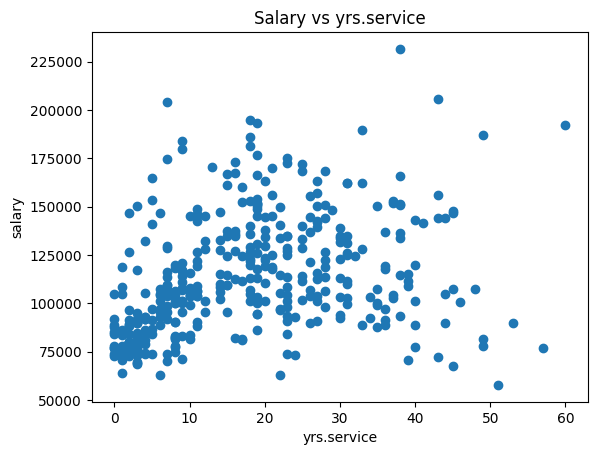

In [30]:
plt.scatter(x=data["yrs.service"], y=data["salary"])
plt.xlabel("yrs.service")
plt.ylabel("salary")
plt.title("Salary vs yrs.service")

<Axes: >

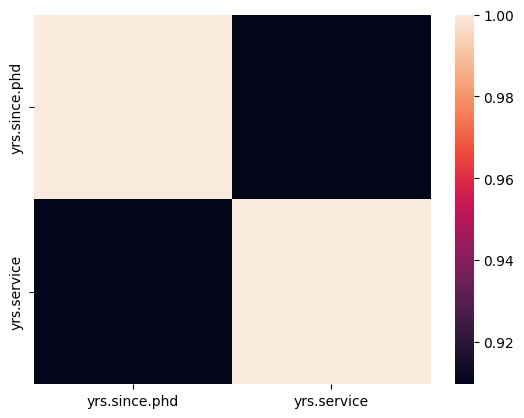

In [ ]:
#correlation between variables in the feature matrix
corr=data.select_dtypes("number").drop(columns="salary").corr()
corr
sns.heatmap(corr)

Text(0.5, 1.0, 'Distribution of Salary')

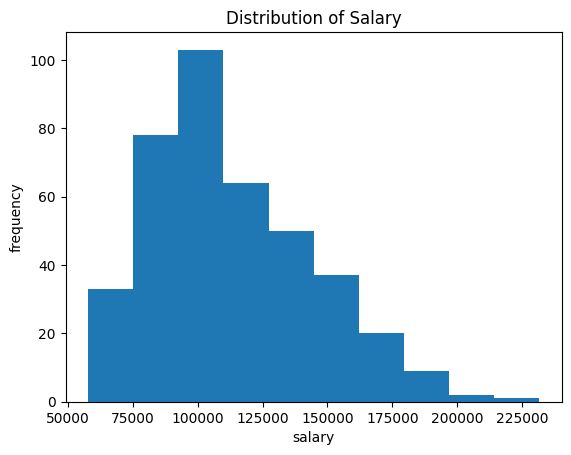

In [32]:
#histogram of target matrix
plt.hist(data["salary"])
plt.xlabel("salary")
plt.ylabel("frequency")
plt.title("Distribution of Salary")

In [36]:
#split of data into training data
target="salary"
features=['rank','discipline', 'yrs.since.phd', 'yrs.service', 'sex']
y_train=data[target]
X_train=data[features]
X_train.shape
y_train.shape


(397,)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [ ]:
#make a baseline model
y_mean=y_train.mean()
y_pred_baseline=[y_mean]*len(y_train)
print("Mean salary:", mean_absolute_error(y_train,y_pred_baseline))

Mean salary: 24520.810994296007


In [ ]:
#build a model
cc

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['rank', 'discipline', 'sex'],
                               verbose='use_cat_name=True')),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [ ]:
y_pred_training=model.predict(X_train)
mae_training=mean_absolute_error(y_train,y_pred_training)
mae_training

16509.25608309031

In [54]:
X_test=pd.read_csv("salary.csv")[features]
y_pred_test=pd.Series(model.predict(X_test))
y_pred_test.head(5)

0    131302.544434
1    132841.597790
2     86067.716779
3    135342.373214
4    131589.633390
dtype: float64

In [ ]:
intercept=model.named_steps['ridge'].intercept_
intercept

np.float64(94732.23707032872)

In [58]:
coefficients=model.named_steps['ridge'].coef_
coefficients

array([ 25362.44270909, -18963.29873466,  -6399.14397443,   7186.01233851,
        -7186.01233851,    553.42161698,   -492.8158696 ,   2377.52724605,
        -2377.52724605])

In [67]:
feature_names=model.named_steps['onehotencoder'].get_feature_names()
#nt ('feature lens;' len(feature_names))
feature_names

C:\Users\SIPHANE\AppData\Local\Temp\ipykernel_1148\989561749.py:1: FutureWarning:

`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.



array(['rank_1', 'rank_2', 'rank_3', 'discipline_1', 'discipline_2',
       'yrs.since.phd', 'yrs.service', 'sex_1', 'sex_2'], dtype=object)

In [68]:
feat_imp=pd.Series(coefficients,index=feature_names)
feat_imp

rank_1           25362.442709
rank_2          -18963.298735
rank_3           -6399.143974
discipline_1      7186.012339
discipline_2     -7186.012339
yrs.since.phd      553.421617
yrs.service       -492.815870
sex_1             2377.527246
sex_2            -2377.527246
dtype: float64

Text(0.5, 1.0, 'Feature Important for Salary')

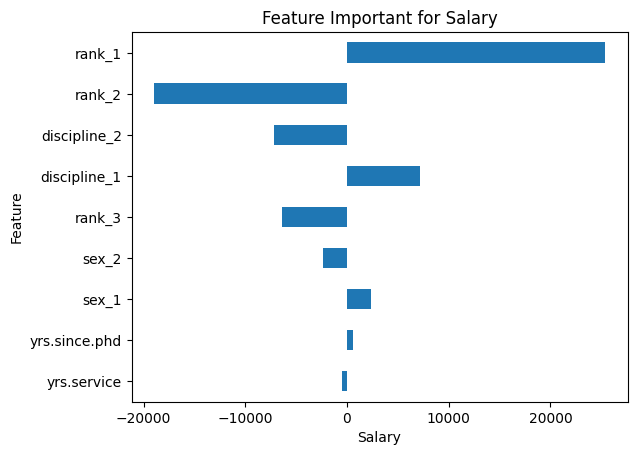

In [ ]:
#bar_chart
feat_imp.sort_values(key=abs).tail(15).plot(kind="barh")
plt.xlabel("Salary")
plt.ylabel("Feature")
plt.title("Feature Important for Salary")

In [ ]:
# a function of predictions
def make_predictions(rank, discipline, yrs_since_phd, yrs_service, sex):
    df = {
        "rank": [rank],
        "discipline": [discipline],
        "yrs.since.phd": [yrs_since_phd],
        "yrs.service": [yrs_service],
        "sex": [sex]
    }
    data = pd.DataFrame(df)
    predictions = model.predict(data).round(2)[0]
    return f"predicted salary: {predictions}"

In [ ]:
# Assuming model is already trained
#Test the model
result = make_predictions("Prof", "B", 15, 10, "Male")
print(result)

predicted salary: 133031.38
